In [29]:
%load_ext autoreload
%autoreload 1

In [35]:
import math
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets

import time
from IPython import display

from JAVER.track_tools import Track

In [42]:
ts = np.arange(0, math.tau, 0.1)
xs = np.cos(ts)
ys = np.sin(2*ts) / 2

noise_x = np.random.normal(0.0, 0.03, ts.shape)
noise_y = np.random.normal(0.0, 0.05, ts.shape)

measure_xs = xs + noise_x
measure_ys = ys + noise_y

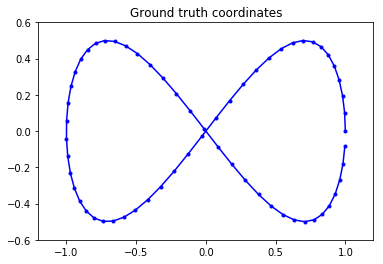

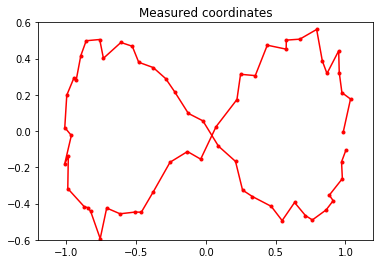

In [48]:
plt.plot(xs, ys, 'b.-')
plt.xlim(-1.2,1.2)
plt.ylim(-0.6,0.6)
plt.title('Ground truth coordinates')
plt.show()

plt.plot(measure_xs, measure_ys, 'r.-')
plt.xlim(-1.2,1.2)
plt.ylim(-0.6,0.6)
plt.title('Measured coordinates')
plt.show()

In [51]:
for i in range(0, len(ts), 2):
    plt.clf()
    plt.plot(xs[:i], ys[:i], 'b.-')
    plt.title('Ground truth coordinates')
    
    plt.xlim(-1.2,1.2)
    plt.ylim(-0.6,0.6)

    plt.show()
    pl.clf()
    display.display(plt.gcf())
    display.clear_output(wait=True)
    time.sleep(.05)

<Figure size 432x288 with 0 Axes>

In [205]:
np.asarray([50])[0]

50

In [352]:
class Track:
    def __init__(self, x, y, xv, yv, dt):
        self.state_x = np.asarray([x,y,xv,yv]).reshape(4,1)
        self.state_cov =  np.diag(np.ones(len(self.state_x)))
        self.dt = dt

        self.H = np.asarray([
            [1, 0, dt, 0],
            [0, 1, 0, dt],
            [0, 0, 1, 0],
            [0, 0, 0, 1],
        ])

        self.R =  ([
            [0.03, 0, 0, 0],
            [0, 0.05, 0, 0],
            [0, 0, 1, 0],
            [0, 0, 0, 1],
        ])
        return 
    
    def predict_state(self):
        x_now = self.state_x
        P_now = self.state_cov
        H = self.H

        x_pred = H @ x_now
        P_pred = H @ P_now @ H.T

        return x_pred, P_pred

    def update_state(self, x, y, xv, yv):
        dt = self.dt
        x_now = self.state_x
        
        z = np.asarray([x,y,xv,yv]).reshape(4,1)
        
        x_now = self.state_x
        P_now = self.state_cov
        H = self.H
        R = self.R
        
        K = P_now @ H.T @ np.linalg.inv(H @ P_now @ H.T + R)

        x_next = x_now + K @ (z - H @ x_now)
        P_next = P_now - K @ H @ P_now

        self.state_x = x_next
        self.state_cov = P_next / np.linalg.norm(P_next)

        return

In [353]:
dt = ts[1]-ts[0]
track = Track(measure_xs[0], measure_ys[0], 0, 0, dt=dt)

pred_xs, pred_ys = [], []
for i in range(1, len(ts), 1):
    plt.clf()
    
    # Predict states
    _pred_xy, _pred_cov = track.predict_state()
    pred_x, pred_y = _pred_xy[:2]
    pred_cov = _pred_cov[:2, :2]
    
    # Plot predicted x, y
    pred_xs.append(pred_x)
    pred_ys.append(pred_y)
    plt.plot(pred_xs, pred_ys, 'g.-')
    
    # plot predict covariance
    cov_xs, cov_ys = np.random.multivariate_normal(np.asarray((pred_x, pred_y)).squeeze(), pred_cov, (2, 500))
    plt.scatter(cov_xs, cov_ys, color='green', alpha=0.1)
    
    # Plot ground truth x, y
    plt.plot(xs[:i], ys[:i], 'b.-')
    
    # Plot measured x, y
    plt.plot(measure_xs[:i], measure_ys[:i], 'r.-')
    
    # Congfigure plot
    plt.xlim(-1.2,1.2)
    plt.ylim(-0.6,0.6)
    plt.title('Kalman Filter in Action')
    plt.show()

    display.display(plt.gcf())
    display.clear_output(wait=True)
    time.sleep(.05)
    
    track.update_state(measure_xs[i], measure_ys[i], (measure_xs[i] - measure_xs[i-1])/dt, (measure_ys[i] - measure_ys[i-1])/dt)
time.sleep(2)

<Figure size 432x288 with 0 Axes>

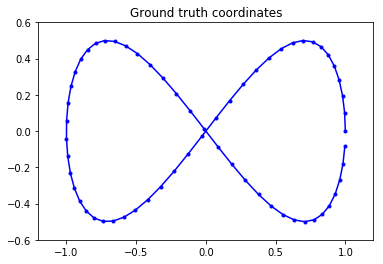

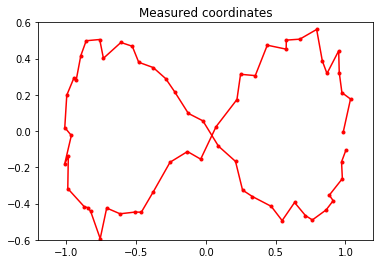

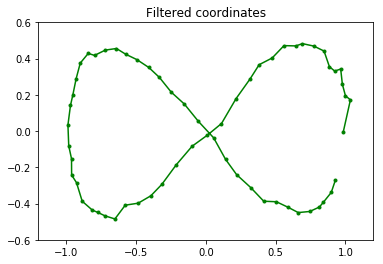

In [354]:
plt.plot(xs, ys, 'b.-')
plt.xlim(-1.2,1.2)
plt.ylim(-0.6,0.6)
plt.title('Ground truth coordinates')
plt.show()

plt.plot(measure_xs, measure_ys, 'r.-')
plt.xlim(-1.2,1.2)
plt.ylim(-0.6,0.6)
plt.title('Measured coordinates')
plt.show()


plt.plot(pred_xs, pred_ys, 'g.-')
plt.xlim(-1.2,1.2)
plt.ylim(-0.6,0.6)
plt.title('Filtered coordinates')
plt.show()

In [359]:
np.diag(np.ones(len(self.state_x))) * conf

NameError: name 'self' is not defined